In [1]:
%matplotlib inline

In [2]:
import matplotlib
print(matplotlib.__version__)

3.8.4


# 学习更多图表和定制化

## 设置坐标轴标签的透明度和大小
Axes标签对于读者理解图表非常重要，它描述了图表中展现的数据内容。
通过向Axes添加标签，我们能够帮助读者更准确地理解图表所表达的信息。

在深入分析代码之前，十分有必要先了解一下matplotlib是如何组织图表的。 

最上层是一个Figure实例，包含了所有可见的和其他一些不可见的内容。该Figure实例包含了一个Axes实例字段 Figure.axes。
Axes实例几乎包含了我们所关心的所有东西，如所有的线、点、刻度和标签。因此，当调用plot()方法时，程序就会向Axes.lines列表添加一个线条的实例（matplotlib.lines.Line2D）。
如果绘制了一个直方图（通过调用hist()），程序就会向Axes.patches列表添加许多矩形 （“patches”是从MATLABTM继承来的一个术语，表示“颜色补片”的概念）。 

Axes实例也包含了XAxis和YAxis实例的引用，分别指向相应的x轴和y轴。XAxis和YAxis管理坐标轴、标签、刻度、刻度标签、定位器和格式器的绘制，我们可以通过Axes.xaxis和Axes.yaxis分别引用它们。
其实不必按照前面所说的方式通过XAxis或YAxis实例得到标签对象，因为matplotlib提供了helper方法（实际上是一个捷径）来迭代这些标签，它们是matplotlib.pyplot.xlabel()和 matplotlib.pyplot.ylabel()。

我们现在将要创建一个新的图形，然后在其上进行如下操作。

1. 创建一个包含一些随机生成的数据的图表。
2. 添加title和Axes标签。
3. 添加alpha设置。
4. 向title和Axes标签添加阴影效果。

操作步骤的代码如下。

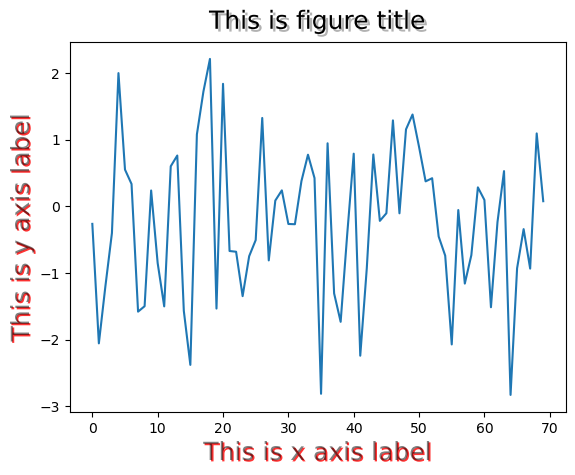

In [3]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
data = np.random.randn(70)

fontsize = 18
plt.plot(data)

title = "This is figure title"
x_label = "This is x axis label"
y_label = "This is y axis label"

title_text_obj = plt.title(title, fontsize=fontsize, verticalalignment='bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

# offset_xy -- set the 'angle' of the shadow
# shadow_rgbFace -- set the color of the shadow
# patch_alpha -- setup the transparency of the shadow

offset_xy = (1, -1)
rgbRed = (1.0,0.0,0.0)
alpha = 0.8

# customize shadow properties
pe = patheffects.withSimplePatchShadow(offset = offset_xy,
    shadow_rgbFace = rgbRed,
    alpha = alpha)
# apply them to the xaxis and yaxis labels
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
xlabel_obj.set_path_effects([pe])

ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.show()

## 为图表线条添加阴影

为了区分图表中的某一线条，或者仅仅为了保持包含图表在内的所有表格的总体风格一致，有时需要为图表线条（或者直方图）添加阴影效果。

为了向图表中的线条或者矩形条添加阴影，我们需要使用matplotlib内置的transformation框架，它位于
matplotlib.transforms模块中。

为了理解所有这些是如何工作的，我们需要解释下matplotlib中的transformation框架以及它们的工作原理。

transformation知道如何将给定的坐标从其坐标系转换到显示坐标系中，它们也知道如何将坐标从显示坐标系转换成它们自己的坐标系。

下面是向图表添加阴影效果的代码。

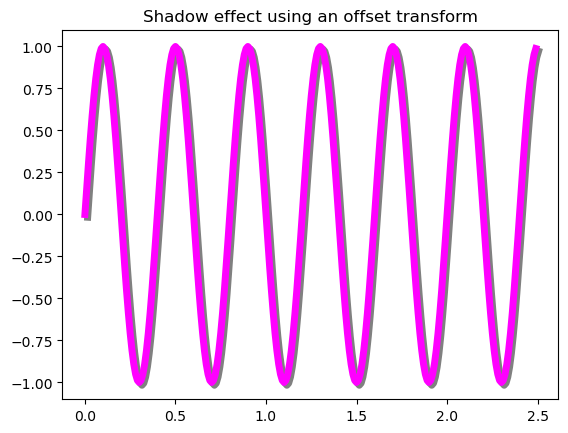

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

def setup(layout=None):
    assert layout is not None
    fig = plt.figure()
    ax = fig.add_subplot(layout)
    return fig, ax
    
def get_signal():
    t = np.arange(0., 2.5, 0.01)
    s = np.sin(5 * np.pi * t)
    return t, s

def plot_signal(t, s):
    line, = axes.plot(t, s, linewidth=5, color='magenta')
    return line
    
def make_shadow(fig, axes, line, t, s):
    delta = 2 / 72. # how many points to move the shadow
    offset = transforms.ScaledTranslation(delta, -delta, fig.dpi_scale_trans)
    offset_transform = axes.transData + offset

    # We plot the same data, but now using offset transform
    # zorder -- to render it below the line
    axes.plot(t, s, linewidth=5, color='gray',
                transform=offset_transform,
                zorder=0.5 * line.get_zorder())

if __name__ == "__main__":
    fig, axes = setup(111)
    t, s = get_signal()
    line = plot_signal(t, s)
    make_shadow(fig, axes, line, t, s)
    axes.set_title('Shadow effect using an offset transform')
    plt.show()

In [ ]:
## 向图表添加数据表